In [1]:
#!pip install PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 1.9 MB/s eta 0:00:0000:0100:01


In [1]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
import seaborn as sns
import squarify
import matplotlib
from matplotlib import patheffects as pe

import regex as re
import string

import tqdm
from  pprint import pprint

import fitz  ### it is PyMuPDF

from collections import defaultdict, namedtuple

plt.rcParams["figure.figsize"] = (15, 10)

# Беларуская_народная_творчасць. Прыказкі_і_прымаўкі

### read pdf

In [2]:
path = 'books/Беларуская_народная_творчасць.Прыказкі_і_прымаўкі.pdf'

pdf = fitz.open(path)


In [3]:
test_page = pdf[50]
test_page

page 50 of books/Беларуская_народная_творчасць.Прыказкі_і_прымаўкі.pdf

In [4]:
print(test_page.get_text())

ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. 
ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ 
1. Зямля — маці, а праца — бацька. Л. Корсак, 1961, Асіп. 
13.9.11*. 
2. Зямелька — матка наша: i корміць, i поіць, i адзяваець 
нас. Hoc, 49. 
3. Зямля — нас усіх маці; яна нас корміць, яна нас прыгор-
не. Fed., 355. 
а) Зямелька нас корміць, а сама есці просіць. Нос, 
Слов., 
208. 
4. Зямля багацей ад усіх. Сержп., 17. 
5. Зямля не згарыць, не ўтоне. Fed., 355. 
а) Зямля не тонець, не гарыць. Нос, 49. Вар.: Ром., Бел., 
I, 296. 
6. На добрай зямлі добра надзея. Fed., 355. 
7. Такая зямля добрая: пасадзі аглоблю — калёсы вырас-
туць. В. Іваноўская, 1962, Светл. 8.1.74. 
8. На добрай зямлі дзіця пасадзі, i тое вырасце. Сержп., 85. 
Вар.: Сержп., 32. 
9. Якая зямля, такі i хлеб. Сержп., 85. 
* Такія пашпарты даюцца да запісаў, якія захоўваюцца ў АІМЭФ. 
Яны азначаюць адпаведна прозвішча збіральніка, год i месца запісу, фонд, 
вопіс i справу. 
4* 
51 



In [5]:
ttext = test_page.get_text()

In [6]:
ttext.split('\n')

["ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ",
 'ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ ',
 '1. Зямля — маці, а праца — бацька. Л. Корсак, 1961, Асіп. ',
 '13.9.11*. ',
 '2. Зямелька — матка наша: i корміць, i поіць, i адзяваець ',
 'нас. Hoc, 49. ',
 '3. Зямля — нас усіх маці; яна нас корміць, яна нас прыгор-',
 'не. Fed., 355. ',
 'а) Зямелька нас корміць, а сама есці просіць. Нос, ',
 'Слов., ',
 '208. ',
 '4. Зямля багацей ад усіх. Сержп., 17. ',
 '5. Зямля не згарыць, не ўтоне. Fed., 355. ',
 'а) Зямля не тонець, не гарыць. Нос, 49. Вар.: Ром., Бел., ',
 'I, 296. ',
 '6. На добрай зямлі добра надзея. Fed., 355. ',
 '7. Такая зямля добрая: пасадзі аглоблю — калёсы вырас-',
 'туць. В. Іваноўская, 1962, Светл. 8.1.74. ',
 '8. На добрай зямлі дзіця пасадзі, i тое вырасце. Сержп., 85. ',
 'Вар.: Сержп., 32. ',
 '9. Якая зямля, такі i хлеб. Сержп., 85. ',
 '* Такія пашпарты даюцца да запісаў, якія захоўваюцца ў АІМЭФ. ',
 'Яны азначаюць адпаведна прозвішча збіральніка, год i месца запісу, фонд, ',
 'вопіс i справу

## Raw regex approach

#### let's parse it, experiments

In [9]:
# for i in re.split('(\n\d+\. )|(\n\p{L}\) .+)', ttext, flags=re.DOTALL):
for i in re.split('(\n\d+\. )', ttext, flags=re.DOTALL):
    print(i)
    print ('*' * 10, '\n')

ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. 
ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ 
********** 


1. 
********** 

Зямля — маці, а праца — бацька. Л. Корсак, 1961, Асіп. 
13.9.11*. 
********** 


2. 
********** 

Зямелька — матка наша: i корміць, i поіць, i адзяваець 
нас. Hoc, 49. 
********** 


3. 
********** 

Зямля — нас усіх маці; яна нас корміць, яна нас прыгор-
не. Fed., 355. 
а) Зямелька нас корміць, а сама есці просіць. Нос, 
Слов., 
********** 


208. 
********** 


********** 


4. 
********** 

Зямля багацей ад усіх. Сержп., 17. 
********** 


5. 
********** 

Зямля не згарыць, не ўтоне. Fed., 355. 
а) Зямля не тонець, не гарыць. Нос, 49. Вар.: Ром., Бел., 
I, 296. 
********** 


6. 
********** 

На добрай зямлі добра надзея. Fed., 355. 
********** 


7. 
********** 

Такая зямля добрая: пасадзі аглоблю — калёсы вырас-
туць. В. Іваноўская, 1962, Светл. 8.1.74. 
********** 


8. 
********** 

На добрай зямлі дзіця пасадзі, i тое вырасце. Сержп., 85. 
Вар.: Сержп., 32. 
********** 


9. 
********** 

Яка

In [10]:
ttext = pdf[50].get_text()
for i in re.split('(\n\d+\. )|(^\d+\. )', ttext, flags=re.DOTALL):
    print(i)
    print ('*' * 10, '\n')

ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. 
ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ 
********** 


1. 
********** 

None
********** 

Зямля — маці, а праца — бацька. Л. Корсак, 1961, Асіп. 
13.9.11*. 
********** 


2. 
********** 

None
********** 

Зямелька — матка наша: i корміць, i поіць, i адзяваець 
нас. Hoc, 49. 
********** 


3. 
********** 

None
********** 

Зямля — нас усіх маці; яна нас корміць, яна нас прыгор-
не. Fed., 355. 
а) Зямелька нас корміць, а сама есці просіць. Нос, 
Слов., 
********** 


208. 
********** 

None
********** 


********** 


4. 
********** 

None
********** 

Зямля багацей ад усіх. Сержп., 17. 
********** 


5. 
********** 

None
********** 

Зямля не згарыць, не ўтоне. Fed., 355. 
а) Зямля не тонець, не гарыць. Нос, 49. Вар.: Ром., Бел., 
I, 296. 
********** 


6. 
********** 

None
********** 

На добрай зямлі добра надзея. Fed., 355. 
********** 


7. 
********** 

None
********** 

Такая зямля добрая: пасадзі аглоблю — калёсы вырас-
туць. В. Іваноўская, 1962, Светл. 8.1.74. 

In [11]:
t = """Як патрудзішся, так пажывішся. 
Янк., Дыял., 
III, 111, 
Глуск. 
а) Патрудзіцца — тагды i пажывіцца. Янк., Дыял., 
III, 
111, Глуск. """

t1 = """Хто не лянуецца туптаць, той мае што хруптаць. Fed., 315."""

print(re.split('(\n\p{L}\) .+)', t, flags=re.DOTALL))
print(re.split('(\n\p{L}\) .+)', t1, flags=re.DOTALL))

['Як патрудзішся, так пажывішся. \nЯнк., Дыял., \nIII, 111, \nГлуск. ', '\nа) Патрудзіцца — тагды i пажывіцца. Янк., Дыял., \nIII, \n111, Глуск. ', '']
['Хто не лянуецца туптаць, той мае што хруптаць. Fed., 315.']


#### main parsing cycle

In [12]:
proverb_start_page = 50
proverb_end_page = 512

In [ ]:
current_label = ''
current_number = 0

proverb_by_num_pattern = '(\n\d+\. )|(^\d+\. )'
# proverb_by_num_pattern = '(\n?\d+\. )'

proverbs = defaultdict(list)
ProverbInfo = namedtuple('ProverbInfo', ['number', 'proverb', 'book_page'])

possible_remove = []

for i in tqdm.tqdm(range(proverb_start_page, proverb_end_page)):
    cur_page_txt = pdf[i].get_text() 
    
    candidates = re.split(proverb_by_num_pattern, cur_page_txt, flags=re.DOTALL)
    
    for k, candi in enumerate(candidates):
        if candi is None:
            continue
        elif ((k == 0) and candi.isupper()):
            current_label = candi.replace('\n', '').strip()
            # print(current_label, '\n***********')
            continue

        if re.match('\n?\d+\. ', candi):
            new_num = int(candi.split('.')[0])
            # print(new_num)
            if abs(new_num - current_number) > 3:
                # print(f'Page {i + 1}, {current_number=} and {new_num=} are not close!')
                pass
            current_number = new_num  
        else:
            # need to clean all variations like this:
                # Не кайся рана ўстаць, а кайся позна спаць. Зах.і 250. 
                # а) Не жалей, рана ўстаўшы i позна палажыўшыся. Mien.,
            # each case with 'a)', 'b)', etc. should be processed as separate proverb 
            # and then concatenated with first version
            split_by_variations = re.split('(\n\p{L}\) .+)', candi, flags=re.DOTALL)

            final_proverb_form = ''
            
            # get rid of annotations like 'Зах.і 250.', 'Mien.,', etc.
            final_proverb_form = '\n'.join([vari.split('.')[0].replace('\n', ' ')
                                            for vari in split_by_variations if vari != ''])

            #get rid of word wrap to another line like here: 
                # яна нас корміць, яна нас прыгор- не
            final_proverb_form = re.sub('\p{L}- ', lambda x: x.group(0)[0] , final_proverb_form)
            
            
            if final_proverb_form == '':
                continue
            elif len(final_proverb_form) < 9: #removing short sentences which are dummy words
                possible_remove.append(ProverbInfo(current_number, final_proverb_form, i+1))
                continue
                
            proverbs[current_label].append(ProverbInfo(current_number, final_proverb_form, i+1))

proverbs

In [109]:
print(f'How many proverbs?\n')
pprint([f'{key}: {len(val)}' for key, val in proverbs.items()])
print('IN GENERAL:', sum([len(val) for key, val in proverbs.items()]))

How many proverbs?

["ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ: 298",
 'ПОРЫ ГОДУ. ЧАС. НАРОДНЫ КАЛЯНДАР: 556',
 'СЕЛЬСКАЯ ГАСПАДАРКА: 425',
 'ПРОМЫСЛЫ I РАМЕСТВЫ: 480',
 'ГАСПАДАРЛІВАСЦЬ. СЯЛЯНСКАЯ СЯДЗІБА: 326',
 'ХАТА, ХАТНЯЕ АБСТАЛЯВАННЕ I НАЧЫННЕ: 116',
 'ХАРЧАВАННЕ: 615',
 'АДЗЕННЕ, АБУТАК, УПРЫГОЖАННІ: 150',
 'ТРАНСПАРТНЫЯ СРОДКІ I ШЛЯХІ ЗНОСІН. У ДАРОЗЕ: 124',
 'РАДЗІМА. ЧУЖЫНА: 105',
 'КАРОЛЬ, ЦАР. ПАНЫ, ПАДПАНКІ, ШЛЯХТА. ПРЫГОН, МУЖЫКІ: 399',
 'ПОП, КСЕНДЗ. ЦАРКОУНЫЯ СЛУЖКІ: 164',
 'ЧЫНОУНІЦТВА. НАЧАЛЬСТВА. КАЗНА. ПАДАТКІ. ХАБАРНІЦТВА: 117',
 'СУД. ЗАКОНЫ. ТУРМА: 124',
 'СЛУЖБА. НАЙМЫ: 125',
 'ГРАМАДА. КАЛЕКТЫВІЗМ. ІНДЫВІДУАЛІЗМ: 171',
 'СЯБРОУСТВА. ВАРОЖАСЦЬ. СУСЕДСТВА. ГАСЦІННАСЦЬ: 321',
 'БЕДНАСЦЬ. ЖАБРАЦТВА. БАГАЦТВА. САЦЫЯЛЬНА-МАЕМАСНАЯ НАРОУНАСЦЬ: 404',
 'БЯДА, ГОРА, ЛІХА, НАПАСЦЬ, ЗЛЫДНІ. БЕЗВЫХОДНАСЦЬ. СПАДЗЯВАННІ: 251',
 'ГАНДАЛЬ. ГРОШЫ. ПАЗЫКІ. ДАУГІ. КАРЧМА: 487',
 'РЭКРУТЧЫНА, САЛДАТЧЫНА. ВОЙНЫ. ВОДГУКІ НА ГІСТАРЫЧНЫЯ ПАДЗЕІ: 132',
 'ПРАЗВАННІ ЖЫХАРОУ 

#### handle special cases

Return 'Праца' category. It starts at 164 page and ends at 182 page

In [110]:
indexes_to_remove = []
for i in range(len(proverbs['ПРОМЫСЛЫ I РАМЕСТВЫ'])):
    if proverbs['ПРОМЫСЛЫ I РАМЕСТВЫ'][i].book_page >= 164:
        proverbs['ПРАЦА'].append(proverbs['ПРОМЫСЛЫ I РАМЕСТВЫ'][i])
        indexes_to_remove.append(i)
    
proverbs['ПРОМЫСЛЫ I РАМЕСТВЫ'] = [v for i, v in enumerate(proverbs['ПРОМЫСЛЫ I РАМЕСТВЫ']) if i not in indexes_to_remove]
    

In [111]:
print(f'How many proverbs?\n')
pprint([f'{key}: {len(val)}' for key, val in proverbs.items()])

How many proverbs?

["ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ: 298",
 'ПОРЫ ГОДУ. ЧАС. НАРОДНЫ КАЛЯНДАР: 556',
 'СЕЛЬСКАЯ ГАСПАДАРКА: 425',
 'ПРОМЫСЛЫ I РАМЕСТВЫ: 226',
 'ГАСПАДАРЛІВАСЦЬ. СЯЛЯНСКАЯ СЯДЗІБА: 326',
 'ХАТА, ХАТНЯЕ АБСТАЛЯВАННЕ I НАЧЫННЕ: 116',
 'ХАРЧАВАННЕ: 615',
 'АДЗЕННЕ, АБУТАК, УПРЫГОЖАННІ: 150',
 'ТРАНСПАРТНЫЯ СРОДКІ I ШЛЯХІ ЗНОСІН. У ДАРОЗЕ: 124',
 'РАДЗІМА. ЧУЖЫНА: 105',
 'КАРОЛЬ, ЦАР. ПАНЫ, ПАДПАНКІ, ШЛЯХТА. ПРЫГОН, МУЖЫКІ: 399',
 'ПОП, КСЕНДЗ. ЦАРКОУНЫЯ СЛУЖКІ: 164',
 'ЧЫНОУНІЦТВА. НАЧАЛЬСТВА. КАЗНА. ПАДАТКІ. ХАБАРНІЦТВА: 117',
 'СУД. ЗАКОНЫ. ТУРМА: 124',
 'СЛУЖБА. НАЙМЫ: 125',
 'ГРАМАДА. КАЛЕКТЫВІЗМ. ІНДЫВІДУАЛІЗМ: 171',
 'СЯБРОУСТВА. ВАРОЖАСЦЬ. СУСЕДСТВА. ГАСЦІННАСЦЬ: 321',
 'БЕДНАСЦЬ. ЖАБРАЦТВА. БАГАЦТВА. САЦЫЯЛЬНА-МАЕМАСНАЯ НАРОУНАСЦЬ: 404',
 'БЯДА, ГОРА, ЛІХА, НАПАСЦЬ, ЗЛЫДНІ. БЕЗВЫХОДНАСЦЬ. СПАДЗЯВАННІ: 251',
 'ГАНДАЛЬ. ГРОШЫ. ПАЗЫКІ. ДАУГІ. КАРЧМА: 487',
 'РЭКРУТЧЫНА, САЛДАТЧЫНА. ВОЙНЫ. ВОДГУКІ НА ГІСТАРЫЧНЫЯ ПАДЗЕІ: 132',
 'ПРАЗВАННІ ЖЫХАРОУ 

---
Handling case when new page starts with variant like 'б) *variant*'

In [ ]:
prev_prev = ProverbInfo(-2, '', 0)
prev = ProverbInfo(-1, '', 0)
count_occasions = 0
for ctg in proverbs:
    for prov in proverbs[ctg]:
        if re.match('\n?\p{L}\)', prov.proverb):
            count_occasions += 1
            print(f'{prev_prev.proverb=}, {prev_prev.book_page=}')
            print(f'{prev.proverb=}, {prev.book_page=}')
            print(f'{prov.proverb=}')
            print('*'*10)
        prev_prev = prev
        prev = prov
        

count_occasions

In [86]:
len(' 491  ')

6

#### save this version

In [116]:
raw_regex_proverbs = pd.DataFrame.from_dict(proverbs, orient='index')

In [125]:
raw_regex_proverbs = raw_regex_proverbs.reset_index().melt(id_vars='index', value_name='proverb',).dropna()
raw_regex_proverbs.head()

,index,variable,proverb
0,"ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІНН...",0,"(1, Зямля — маці, а праца — бацька, 51)"
1,ПОРЫ ГОДУ. ЧАС. НАРОДНЫ КАЛЯНДАР,0,"(288, Жураўлі ляцяць высока — зіма яшчэ далека..."
2,СЕЛЬСКАЯ ГАСПАДАРКА,0,"(830, Пабыла Хімка ў лядах, пабачыла працы, 115)"
3,ПРОМЫСЛЫ I РАМЕСТВЫ,0,"(1244, 3 рамяством дружыць — у жыцці не тужыць..."
4,ГАСПАДАРЛІВАСЦЬ. СЯЛЯНСКАЯ СЯДЗІБА,0,"(1, Твае хадзяйства — твая воля, 185)"


In [133]:
raw_regex_proverbs = raw_regex_proverbs.drop(labels=['variable'], axis=1)
raw_regex_proverbs = raw_regex_proverbs.rename(columns={'index': 'category'})
raw_regex_proverbs.head()

,category,proverb
0,"ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІНН...","(1, Зямля — маці, а праца — бацька, 51)"
1,ПОРЫ ГОДУ. ЧАС. НАРОДНЫ КАЛЯНДАР,"(288, Жураўлі ляцяць высока — зіма яшчэ далека..."
2,СЕЛЬСКАЯ ГАСПАДАРКА,"(830, Пабыла Хімка ў лядах, пабачыла працы, 115)"
3,ПРОМЫСЛЫ I РАМЕСТВЫ,"(1244, 3 рамяством дружыць — у жыцці не тужыць..."
4,ГАСПАДАРЛІВАСЦЬ. СЯЛЯНСКАЯ СЯДЗІБА,"(1, Твае хадзяйства — твая воля, 185)"


In [135]:
raw_regex_proverbs[['number', 'proverb', 'book_page']] = raw_regex_proverbs['proverb'].apply(pd.Series)

In [136]:
raw_regex_proverbs.head()

,category,proverb,number,book_page
0,"ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІНН...","Зямля — маці, а праца — бацька",1,51
1,ПОРЫ ГОДУ. ЧАС. НАРОДНЫ КАЛЯНДАР,Жураўлі ляцяць высока — зіма яшчэ далека,288,72
2,СЕЛЬСКАЯ ГАСПАДАРКА,"Пабыла Хімка ў лядах, пабачыла працы",830,115
3,ПРОМЫСЛЫ I РАМЕСТВЫ,3 рамяством дружыць — у жыцці не тужыць,1244,146
4,ГАСПАДАРЛІВАСЦЬ. СЯЛЯНСКАЯ СЯДЗІБА,Твае хадзяйства — твая воля,1,185


In [581]:
raw_regex_proverbs.category.nunique()

23

In [138]:
raw_regex_proverbs.to_csv('data/book_data/raw_regex_Беларуская_народная_творчасць.csv', index=None)

## Pre-filtering text by font
Raw regex approach is not robust to this book annotations. I've been so exausted trying to fix and generalize my regex pattern. Let's try to filter annotations with different tools. PyMuPDF can show you fonts, sizes and other metadata about text. We can use it.

In [859]:
pdf[163].get_text('dict')['blocks'][1:3]

[{'number': 1,
  'type': 0,
  'bbox': (170.52000427246094,
   25.320009231567383,
   207.31829833984375,
   39.17000961303711),
  'lines': [{'spans': [{'size': 9.949873924255371,
      'flags': 20,
      'font': 'Times-Bold',
      'color': 0,
      'ascender': 1.0440000295639038,
      'descender': -0.3409999907016754,
      'text': 'ПРАЦА ',
      'origin': (170.52000427246094, 35.760009765625),
      'bbox': (170.52000427246094,
       25.320009231567383,
       207.31829833984375,
       39.17000961303711)}],
    'wmode': 0,
    'dir': (1.0, 0.0),
    'bbox': (170.52000427246094,
     25.320009231567383,
     207.31829833984375,
     39.17000961303711)}]},
 {'number': 2,
  'type': 0,
  'bbox': (34.44000244140625,
   124.92001342773438,
   253.44384765625,
   138.77001953125),
  'lines': [{'spans': [{'size': 9.949873924255371,
      'flags': 20,
      'font': 'Times-Bold',
      'color': 0,
      'ascender': 1.0440000295639038,
      'descender': -0.3409999907016754,
      'text': '

In [860]:
test_texts = ["5. Зямля не згарыць, не ўтоне.",
              "\n7. Такая зямля добрая: пасадзі аглоблю — калёсы вырас-\nтуць.",
              ' \n7123 Такая зямля добрая: пасадзі аглоблю — калёсы вырас-\nтуць.',
              """ \n7. Такая
              \n123123 зямля добрая: пасадзі аглоблю — калёсы вырас-\nтуць.""",
             ]
for test_text in test_texts:
    print('Original text:\n', test_text)
    print('\nFormatted:\n', re.sub('^\n?\d+\.? ', '', test_text.strip()))
    print('*'* 20)

Original text:
 5. Зямля не згарыць, не ўтоне.

Formatted:
 Зямля не згарыць, не ўтоне.
********************
Original text:
 
7. Такая зямля добрая: пасадзі аглоблю — калёсы вырас-
туць.

Formatted:
 Такая зямля добрая: пасадзі аглоблю — калёсы вырас-
туць.
********************
Original text:
  
7123 Такая зямля добрая: пасадзі аглоблю — калёсы вырас-
туць.

Formatted:
 Такая зямля добрая: пасадзі аглоблю — калёсы вырас-
туць.
********************
Original text:
  
7. Такая
              
123123 зямля добрая: пасадзі аглоблю — калёсы вырас-
туць.

Formatted:
 Такая
              
123123 зямля добрая: пасадзі аглоблю — калёсы вырас-
туць.
********************


### function for text extraction

In [861]:
def get_text_from_page(page) -> list[str]:
    page_blocks = page.get_text('dict')['blocks']
    text_blocks = []
    for i, block in enumerate(page_blocks):
        if block.get('image'): # every page has a block with image, let's remove it
            continue
            
        block_text = ''
        
        for line in block['lines']:
            line_text = ''
            for span in line['spans']:
                span_text = span['text']
                if 'italic' in span['font'].lower(): # annotations have italic formatting, let's skip them
                    continue
                elif re.fullmatch('\d+\.?', span_text.strip()):
                    continue
                elif span_text.strip() == '' or span_text.strip() == '\n':
                    continue

                span_text = re.sub('^\n?3 ', 'З ', span_text.strip()) # for some reason uppercase belarusian letter 'З' is parsed as number three
                span_text = re.sub('^\n?\d+\.? ', '', span_text.strip())
                
                line_text += ' ' + span_text.strip()
    
            block_text += line_text
        text_blocks.append(block_text.strip())
    return text_blocks

blocks = get_text_from_page(pdf[217])
for b in blocks:
    print(b)
    print('*'*20)

ХАРЧАВАННЕ
********************
Голад астрэй мечы.
********************
Голад не цётка.
********************
Голад не цётка, з'есць, што папала.
********************
а) Голад не цётка, паглядзяць ды з'ядзяць.
********************
Голад не дзядзіна, з'ясі i крадзена.
********************
Голад не свой брат.
********************
Голад i лжэць i крадзець. а) Голад i лгар i злодзей.
********************
Голад крадзе i мусіць.
********************
Голад — найлепшы кухар.
********************
Няма лепшае навукі, як голад.
********************
Голад у свет гоніць.
********************
Голад гоніць на холад.
********************
Возьме голад — паявіцца голас.
********************
Лепшы доўгі голад, як кароткі.
********************

********************


**it works pretty well**

### main cycle

In [862]:
proverb_start_page = 50
proverb_end_page = 512

current_label = ''
current_number = 0

# proverb_by_num_pattern = '(\n\d+\. )|(^\d+\. )'
# proverb_by_num_pattern = '(\n?\d+\. )'

proverbs = defaultdict(list)
ProverbInfo = namedtuple('ProverbInfo', ['number', 'proverb', 'book_page'])

# possible_remove = []

proverbs = []

for page_num in tqdm.tqdm(range(proverb_start_page, proverb_end_page)):
    proverbs.extend(get_text_from_page(pdf[page_num]))

print('amount of raw entries: ', len(proverbs))

100%|█████████████████████████████████████████| 462/462 [00:32<00:00, 14.41it/s]

amount of raw entries:  7380


In [863]:
proverbs[::230]

["ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ.",
 'Кажан гад мае свой яд.',
 'Красавік ваду падбірае, красачкі пушчае.',
 'Калі польскія каляды трашчаць, дык нашы плюшчаць, калі ж польскія плюшчаць, то нашы трашчаць.',
 'На Глеба i Барыса хлеба напарыся i за раллю бярыся.',
 'Хто полю годзіць, у таго жыта родзіць.',
 'Як не будзе галава без воласа, так сцярня без коласа.',
 'Кагда рыбна, то галодна.',
 'Вось на свеце як бывае: хто працуе, той i мае.',
 'Хто ў дзеле, тэй i ў атвеце.',
 'Адна скаціна — руб, паўціна.',
 'Збродлівай кошцы хвост уцінаюць.',
 'Парожня ложка нікому не міла.',
 'Каменні — хоць забіся, вады — хоць утапіся, дроў — хоць спаліся, хлеба дакупіўшы, можна жыць.',
 'г) Як мукі скрыня, то i кошка гаспадыня.',
 'Лыкам чалавека не мер.',
 'Хто ходзіць нацянькі, той набівае ногі i траціць дзянькі. Ради.,',
 'Бліз цара — бліз смерці.',
 'а) Вясковая сабака, а дваровая служака — усе роўна.',
 'Каб панам быў, у масле б плаваў, сырамі папіраўся.',
 'Быць так, як памеціў дзяк.',
 'Добра з тым 

In [864]:
proverbs[:10]

["ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ.",
 'ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ',
 'Зямля — маці, а праца — бацька.',
 'Зямелька — матка наша: i корміць, i поіць, i адзяваець нас.',
 'Зямля — нас усіх маці; яна нас корміць, яна нас прыгор- не.',
 'а) Зямелька нас корміць, а сама есці просіць.',
 'Зямля багацей ад усіх.',
 'Зямля не згарыць, не ўтоне.',
 'а) Зямля не тонець, не гарыць.',
 'На добрай зямлі добра надзея.']

### extra cleaning and formatting
what do we need to do:  

0. remove strange symbols in the beginning of the sentences
1. remove dummy entries like '', '4*', etc.
2. remove line wrapers in words, like 'яна нас прыгор- не.' ==> 'яна нас прыгорне.'
3. get category titles
4. add category to entries
5. concat main variant and additional variants which start with 'x)'
6. add newline between main variant and additional variants

---
#### remove strange symbols in the beginning of the sentences

In [865]:
for i, prov in enumerate(proverbs):
    if re.match('[^\p{L}]', prov):
        if prov.startswith('6)'):
            # continue
            # print(prov.replace('6)', 'б)'))
            proverbs[i] = prov.replace('6)', 'б)')
        elif prov.startswith('3'):
            # continue
            # print(prov.replace('3', 'З'))
            proverbs[i] = prov.replace('3', 'З')
        else:
            # print(re.sub('^[^\p{L}«]*', '', prov))
            proverbs[i] = re.sub('^[^\p{L}«]*', '', prov)
        print(proverbs[i])
        # print('********')

Такія пашпарты даюцца да запісаў, якія захоўваюцца ў АІМЭФ. Яны азначаюць адпаведна прозвішча збіральніка, год i месца запісу, фонд, вопіс i справу.

а ) Як косяць, дажджу не просяць, ён сам ідзе.
б) Ад малой іскры сыр-бор загараецца.




Бедная зямелька лепей за багатага мужыка: багаты дасць i квоту возьме, а бедная зямелька што ні зародзіць — усе наша: нашы вярхушкі, нашы i камлюшкі. ,

б) Будзець пара, будзець i трава.

У яго i шыла брые, а наша i брытва не бярэ.
Q. Сілай капаць — вады не піць. /.
Да ўсяго трэба прахтыкі.
З вуды абед худы.
J366. Ружжо адзін раз у год само страляе.
З музыкі да з млінара не будзе гаспадара.

З ніткі клубок вярціцца.

З-пад печы выгнаць нечага.

На адным сене малака не надоіш.

ГТалоднаму цыганы сняцца.

D2
Сёе-тое на скаварадзе.

Адзін раз густа, a другі раз пуста. /.
З-за адной ежкі сем міль пешкі.

б) Галодны поле пярэйдзеш, а голы не.

Зак. 363



«Дай» — любіць поп усякі, а «на» — ніякі.
Будзе i на крапіву мароз.

З пальца не выссуць людзі.
А*
«U/

In [866]:
for i, prov in enumerate(proverbs):
    if re.match('[^\p{L}]', prov):
        # if prov.startswith('6)'):
        #     # continue
        #     # print(prov.replace('6)', 'б)'))
        #     proverbs[i] = prov.replace('6)', 'б)')
        # elif prov.startswith('3'):
        #     # continue
        #     # print(prov.replace('3', 'З'))
        #     proverbs[i] = prov.replace('3', 'З')
        # else:
        #     # print(re.sub('^[^\p{L}«]*', '', prov))
        #     proverbs[i] = re.sub('^[^\p{L}«]*', '', prov)
        print(proverbs[i])
        # print('********')

«Дай» — любіць поп усякі, а «на» — ніякі.
«U/0. Не так веле помачы, як немачы.
«Дай» ніхто не любіць, а «на» ўсякі чуець. а) «Дай» — не чуе, а «на» — руку суе.


nice!

---
#### remove dummy entries like '', '4*', etc.

In [867]:
max_len = 0
for short in set([proverb for proverb in proverbs if len(proverb) < 10]):
    max_len = max(len(short), max_len)
    print(short.__repr__(), end=' ')

print(f'\n{max_len=}')

'' 'Зак. И З' 'и*' 'Ill' 'Зак.' 'Зак. 363' 'А*' 'З2*' 'II' 'КАРЧМА' 'D2' 'ПРАЦА' 'ю*' 'зо*' 'З1*' 'Ф' 
max_len=8


In [868]:
proverbs = list(filter(lambda x: (len(x) > 8) or ('КАРЧМА' in x) or ('ПРАЦА' in x), proverbs))
set([proverb for proverb in proverbs if len(proverb) < 10])

{'КАРЧМА', 'ПРАЦА'}

---
#### remove line wrapers in words, i.e. 'яна нас прыгор- не.' ==> 'яна нас прыгорне.'

In [869]:
t = 'Зямля — нас усіх маці; яна нас корміць, яна нас прыгор- не.'
re.sub('\p{L}- ', lambda x: x.group(0)[0] , t)

'Зямля — нас усіх маці; яна нас корміць, яна нас прыгорне.'

In [870]:
for i, prov in tqdm.tqdm(enumerate(proverbs)):
    proverbs[i] = re.sub('\p{L}- ', lambda x: x.group(0)[0] , prov)

6935it [00:00, 59377.99it/s]


In [871]:
proverbs[:10]

["ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ.",
 'ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ',
 'Зямля — маці, а праца — бацька.',
 'Зямелька — матка наша: i корміць, i поіць, i адзяваець нас.',
 'Зямля — нас усіх маці; яна нас корміць, яна нас прыгорне.',
 'а) Зямелька нас корміць, а сама есці просіць.',
 'Зямля багацей ад усіх.',
 'Зямля не згарыць, не ўтоне.',
 'а) Зямля не тонець, не гарыць.',
 'На добрай зямлі добра надзея.']

---
#### remove some strange staff like empty sentenses with punctuation only

In [872]:
t2 = """Не ni, не еш i з печы не лезь.
а) Не ni, не еш i з хаты не лезь. 
б) Тры дні не ni, не еш, а з хаты не лезь. /,"""
re.split('[\.]', t2)

['Не ni, не еш i з печы не лезь',
 '\nа) Не ni, не еш i з хаты не лезь',
 ' \nб) Тры дні не ni, не еш, а з хаты не лезь',
 ' /,']

In [873]:
t3 = 'Гаспадарку весці — не лапці плесці. \nа) Дом вясці — не лапці плясці.'

In [874]:
t = """Катку забаўка, а мышцы смерць. Fed., 
а) Кошцы жартушкі, а мышцы смерць [на уме].
б) Кошцы смех, а мышцы смерць.
в) Кату жартушкі, а мышы смяртушкі. 
г) Кошцы смешкі, а мышцы слёзкі."""
print('.'.join(re.split('[\.]', t3)))

Гаспадарку весці — не лапці плесці. 
а) Дом вясці — не лапці плясці.


In [875]:
t4 = 'Калісь то было, да быллем зарасло. //ос,'
print(re.split('([\.])', t4))
''.join([s for s in re.split('([\.])', t4) if (s == '.') or (len(s) > 4)])

['Калісь то было, да быллем зарасло', '.', ' //ос,']


'Калісь то было, да быллем зарасло. //ос,'

In [876]:
count = 0
for i, prov in enumerate(proverbs):
    if any([len(s) < 5 for s in re.split('([\.])', prov) if (s != '') and (s != '.')]):
        count += 1
        splits = [s for s in re.split('([\.])', prov) if (s == '.') or (len(s) >= 5)]
        
        # print(prov)
        # print(''.join(splits).replace('..', '.'))
        # print('**' * 10)
        
        proverbs[i] = ''.join(splits).replace('..', '.')
print(count)

316


In [877]:
for i, prov in enumerate(proverbs):
    if re.match('[^\p{L}]', prov):
        if prov.startswith('6)'):
            # continue
            # print(prov.replace('6)', 'б)'))
            proverbs[i] = prov.replace('6)', 'б)')
        elif prov.startswith('3'):
            # continue
            # print(prov.replace('3', 'З'))
            proverbs[i] = prov.replace('3', 'З')
        else:
            # print(re.sub('^[^\p{L}«]*', '', prov))
            proverbs[i] = re.sub('^[^\p{L}«]*', '', prov)
        print(proverbs[i])
        print('********')

Мала сала, мала хлеба, мала зямлі — болей трэба.
********
Сілай капаць — вады не піць.
********
Ружжо адзін раз у год само страляе.
********
«Дай» — любіць поп усякі, а «на» — ніякі.
********
ЗАКОНЫ. ТУРМА
********
Ha гатовае памагачоў шмат.
********
Не так веле помачы, як немачы.
********
Дурная помач хужы немачы.
********
Як ты да людзей, так i людзі да цябе.
********
Удар аб стол — нажычкі адгукнуцца.
********
Як людзі, так i мы.
********

********
«Дай» ніхто не любіць, а «на» ўсякі чуець. а) «Дай» — не чуе, а «на» — руку суе.
********


---
#### 3. get category titles
#### 4. add category to entries

In [878]:
[p for p in proverbs if 'ЧАВА' in p]

['ХАРЧАВАННЕ']

In [879]:
titles = []
TitleIndex = namedtuple('TitleIndex', ['title', 'index'])
for i, prov in enumerate(proverbs):
    if prov.isupper():
        titles.append(TitleIndex(prov, i))
titles[:10]

[TitleIndex(title="ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ.", index=0),
 TitleIndex(title='ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ', index=1),
 TitleIndex(title='ПОРЫ ГОДУ. НАРОДНЫ КАЛЯНДАР', index=327),
 TitleIndex(title='СЕЛЬСКАЯ ГАСПАДАРКА', index=960),
 TitleIndex(title='ПРОМЫСЛЫ I РАМЕСТВЫ', index=1430),
 TitleIndex(title='ПРАЦА', index=1701),
 TitleIndex(title='МАТЭРЫЯЛЬНЫ БЫТ', index=2003),
 TitleIndex(title='ГАСПАДАРЛІВАСЦЬ. СЯЛЯНСКАЯ СЯДЗІБА', index=2004),
 TitleIndex(title='ХАТА, ХАТНЯЕ АБСТАЛЯВАННЕ I НАЧЫННЕ', index=2379),
 TitleIndex(title='ХАРЧАВАННЕ', index=2508)]

In [880]:
titles

[TitleIndex(title="ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ.", index=0),
 TitleIndex(title='ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ', index=1),
 TitleIndex(title='ПОРЫ ГОДУ. НАРОДНЫ КАЛЯНДАР', index=327),
 TitleIndex(title='СЕЛЬСКАЯ ГАСПАДАРКА', index=960),
 TitleIndex(title='ПРОМЫСЛЫ I РАМЕСТВЫ', index=1430),
 TitleIndex(title='ПРАЦА', index=1701),
 TitleIndex(title='МАТЭРЫЯЛЬНЫ БЫТ', index=2003),
 TitleIndex(title='ГАСПАДАРЛІВАСЦЬ. СЯЛЯНСКАЯ СЯДЗІБА', index=2004),
 TitleIndex(title='ХАТА, ХАТНЯЕ АБСТАЛЯВАННЕ I НАЧЫННЕ', index=2379),
 TitleIndex(title='ХАРЧАВАННЕ', index=2508),
 TitleIndex(title='АДЗЕННЕ, АБУТАК, УПРЫГОЖАННІ', index=3200),
 TitleIndex(title='ТРАНСПАРТНЫЯ СРОДКІ I ШЛЯХІ ЗНОСІН. У ДАРОЗЕ', index=3375),
 TitleIndex(title='ГРАМАДСКАЕ ЖЫЦЦЁ', index=3536),
 TitleIndex(title='РАДЗІМА. ЧУЖЫНА', index=3537),
 TitleIndex(title='КАРОЛЬ, ЦАР. ПАНЫ, ПАДПАНКІ, ШЛЯХТА.', index=3664),
 TitleIndex(title='ПРЫГОН, МУЖЫКІ', index=3665),
 TitleIndex(title='ПОП, КСЕНДЗ. ЦАРКОУНЫЯ СЛУЖКІ', index=4118),
 TitleIndex(titl

In [881]:
prev_title = TitleIndex('-----', -5)

new_titles = []
to_delete_idx = []

for title in titles:
    if abs(title.index - prev_title.index) == 1:
        if prev_title.title.endswith('.'):
            new_titles.append(TitleIndex(prev_title.title + ' ' + title.title, title.index))
        else:
            new_titles.append(TitleIndex(prev_title.title + '. ' + title.title, title.index))
        
        to_delete_idx.append(prev_title.index)
        
    else:
        new_titles.append(title)
    prev_title = title

new_titles = [ttl for ttl in new_titles if ttl.index not in to_delete_idx]
print(len(new_titles))
new_titles

23


[TitleIndex(title="ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ", index=1),
 TitleIndex(title='ПОРЫ ГОДУ. НАРОДНЫ КАЛЯНДАР', index=327),
 TitleIndex(title='СЕЛЬСКАЯ ГАСПАДАРКА', index=960),
 TitleIndex(title='ПРОМЫСЛЫ I РАМЕСТВЫ', index=1430),
 TitleIndex(title='ПРАЦА', index=1701),
 TitleIndex(title='МАТЭРЫЯЛЬНЫ БЫТ. ГАСПАДАРЛІВАСЦЬ. СЯЛЯНСКАЯ СЯДЗІБА', index=2004),
 TitleIndex(title='ХАТА, ХАТНЯЕ АБСТАЛЯВАННЕ I НАЧЫННЕ', index=2379),
 TitleIndex(title='ХАРЧАВАННЕ', index=2508),
 TitleIndex(title='АДЗЕННЕ, АБУТАК, УПРЫГОЖАННІ', index=3200),
 TitleIndex(title='ТРАНСПАРТНЫЯ СРОДКІ I ШЛЯХІ ЗНОСІН. У ДАРОЗЕ', index=3375),
 TitleIndex(title='ГРАМАДСКАЕ ЖЫЦЦЁ. РАДЗІМА. ЧУЖЫНА', index=3537),
 TitleIndex(title='КАРОЛЬ, ЦАР. ПАНЫ, ПАДПАНКІ, ШЛЯХТА. ПРЫГОН, МУЖЫКІ', index=3665),
 TitleIndex(title='ПОП, КСЕНДЗ. ЦАРКОУНЫЯ СЛУЖКІ', index=4118),
 TitleIndex(title='ЧЫНОУНІЦТВА. НАЧАЛЬСТВА. КАЗНА. ПАДАТКІ. ХАБАРНІЦТВА', index=4302),
 TitleIndex(title='ЗАКОНЫ. ТУРМА', index=4451),
 TitleIndex(

In [882]:
for new_ttl in new_titles:
    proverbs[new_ttl.index] = new_ttl.title
proverbs[:5]

["ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ.",
 "ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ",
 'Зямля — маці, а праца — бацька.',
 'Зямелька — матка наша: i корміць, i поіць, i адзяваець нас.',
 'Зямля — нас усіх маці; яна нас корміць, яна нас прыгорне.']

In [883]:
proverbs = [prov for i, prov in enumerate(proverbs) if i not in to_delete_idx]

In [884]:
proverbs[:5]

["ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ",
 'Зямля — маці, а праца — бацька.',
 'Зямелька — матка наша: i корміць, i поіць, i адзяваець нас.',
 'Зямля — нас усіх маці; яна нас корміць, яна нас прыгорне.',
 'а) Зямелька нас корміць, а сама есці просіць.']

In [885]:
new_new_titles = []
TitleIndex = namedtuple('TitleIndex', ['title', 'index'])
for i, prov in enumerate(proverbs):
    if prov.isupper():
        new_new_titles.append(TitleIndex(prov, i))


In [886]:
new_new_titles

[TitleIndex(title="ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ", index=0),
 TitleIndex(title='ПОРЫ ГОДУ. НАРОДНЫ КАЛЯНДАР', index=326),
 TitleIndex(title='СЕЛЬСКАЯ ГАСПАДАРКА', index=959),
 TitleIndex(title='ПРОМЫСЛЫ I РАМЕСТВЫ', index=1429),
 TitleIndex(title='ПРАЦА', index=1700),
 TitleIndex(title='МАТЭРЫЯЛЬНЫ БЫТ. ГАСПАДАРЛІВАСЦЬ. СЯЛЯНСКАЯ СЯДЗІБА', index=2002),
 TitleIndex(title='ХАТА, ХАТНЯЕ АБСТАЛЯВАННЕ I НАЧЫННЕ', index=2377),
 TitleIndex(title='ХАРЧАВАННЕ', index=2506),
 TitleIndex(title='АДЗЕННЕ, АБУТАК, УПРЫГОЖАННІ', index=3198),
 TitleIndex(title='ТРАНСПАРТНЫЯ СРОДКІ I ШЛЯХІ ЗНОСІН. У ДАРОЗЕ', index=3373),
 TitleIndex(title='ГРАМАДСКАЕ ЖЫЦЦЁ. РАДЗІМА. ЧУЖЫНА', index=3534),
 TitleIndex(title='КАРОЛЬ, ЦАР. ПАНЫ, ПАДПАНКІ, ШЛЯХТА. ПРЫГОН, МУЖЫКІ', index=3661),
 TitleIndex(title='ПОП, КСЕНДЗ. ЦАРКОУНЫЯ СЛУЖКІ', index=4114),
 TitleIndex(title='ЧЫНОУНІЦТВА. НАЧАЛЬСТВА. КАЗНА. ПАДАТКІ. ХАБАРНІЦТВА', index=4297),
 TitleIndex(title='ЗАКОНЫ. ТУРМА', index=4446),
 TitleIndex(

In [887]:
all([nn_t.title == n_t.title for nn_t, n_t in zip(new_new_titles, new_titles)])

True

In [888]:
len(proverbs)

6925

In [889]:
title_intervals = [(new_new_titles[i].title, new_new_titles[i].index, new_new_titles[i+1].index) 
                       for i in range(len(new_new_titles)-1)]
title_intervals.append((new_new_titles[-1].title, new_new_titles[-1].index, len(proverbs)))
print(len(title_intervals))
title_intervals[:5]

23


[("ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ", 0, 326),
 ('ПОРЫ ГОДУ. НАРОДНЫ КАЛЯНДАР', 326, 959),
 ('СЕЛЬСКАЯ ГАСПАДАРКА', 959, 1429),
 ('ПРОМЫСЛЫ I РАМЕСТВЫ', 1429, 1700),
 ('ПРАЦА', 1700, 2002)]

In [890]:
title_intervals[-2:]

[('РЭКРУТЧЫНА, САЛДАТЧЫНА. ВОЙНЫ. ВОДГУКІ НА ГІСТАРЫЧНЫЯ ПАДЗЕІ', 6688, 6847),
 ('ПРАЗВАННІ ЖЫХАРОУ РОЗНЫХ МЯСЦОВАСЦЕИ', 6847, 6925)]

In [891]:
proverbs_dict = defaultdict(list)

for t, start, end in title_intervals:
    proverbs_dict[t].extend(proverbs[start+1: end])

In [892]:
proverbs_dict["ПРАЗВАННІ ЖЫХАРОУ РОЗНЫХ МЯСЦОВАСЦЕИ"][-10:]

['Шыркі, Мыркі, Ракшыно, Чарнаусы, Казіно.',
 'Ушацкія ўсе людзі хвацкія.',
 'Баяры слаўныя.',
 'Рубцы Еаўкалацкія.',
 'Гэта ж не Украіна.',
 'Ці ў Падоллю, ці v Расеі, то дарам ніхто нікому не робіць.',
 'У том Луцку ўсё не па-людску: наакал вада, a ў сярэдзіне бяда.',
 'Аж Варшаву відно.',
 'Варшаўская работа.',
 'I ў Парыжу не зробяць аўса з рыжу.']

---
---
#### 5. concat main variant and additional variants which start with 'x)', 
#### 6. add newline between main variant and additional variants

In [893]:
prev_prov = ''
for ctg in proverbs_dict:
    to_delete_indexes = []
    prev_prov = ''
    for i, prov in enumerate(proverbs_dict[ctg]):
        if re.match('\p{L}\)', prov):
            proverbs_dict[ctg][i] = prev_prov + ' ' + prov
            prov = prev_prov + prov
            to_delete_indexes.append(i-1)
        prev_prov = prov
    proverbs_dict[ctg] = [upd_prov for i, upd_prov in enumerate(proverbs_dict[ctg]) if i not in to_delete_indexes]

In [894]:
proverbs_dict['МАТЭРЫЯЛЬНЫ БЫТ. ГАСПАДАРЛІВАСЦЬ. СЯЛЯНСКАЯ СЯДЗІБА'][:10]

['Твае хадзяйства — твая воля.',
 'Сваё хазяйства мілей чужога царства.',
 'Гаспадарку весці — не лапці плесці. а) Дом вясці — не лапці плясці.',
 'Гаспадарку весці — не кашу есці.',
 'Гаспадаркі весці — не барадой трэсці.',
 'Гаспадарку вадзіць — не зажмурыўшы вочы хадзіць.',
 'Паглянем, што ў вас робіцца ў двары, — скажам, якія вы гаспадары.',
 'Вучыся гаспадарыць, яшчэ тавар пасучы.',
 'Як дбаем, так i маем.а) Як хто дбае, так i мае. б) Хто дбае, той i мае.',
 'Мала дбаець, мала й маець. а) Хто мала маець, мала дбаець.']

In [895]:
test_brackets = []
for ctg in proverbs_dict:
    for i, prov in enumerate(proverbs_dict[ctg]):
        if re.findall('\p{L}\)', prov):
            # test_brackets.append(prov)
            # print(re.sub('((?![\(])\p{P} *)(\p{L}\))', lambda x: x.group(1) + '\n' + x.group(2), prov))
            # print('*' * 10)
            proverbs_dict[ctg][i] = re.sub('((?![\(])\p{P} *)(\p{L}\))', lambda x: x.group(1) + '\n' + x.group(2), prov)

In [911]:
proverbs_dict["ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ"].remove('Такія пашпарты даюцца да запісаў, якія захоўваюцца ў АІМЭФ. Яны азначаюць адпаведна прозвішча збіральніка, год i месца запісу, фонд, вопіс i справу.')

In [912]:
proverbs_dict["ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ"][:10]

['Зямля — маці, а праца — бацька.',
 'Зямелька — матка наша: i корміць, i поіць, i адзяваець нас.',
 'Зямля — нас усіх маці; яна нас корміць, яна нас прыгорне. \nа) Зямелька нас корміць, а сама есці просіць.',
 'Зямля багацей ад усіх.',
 'Зямля не згарыць, не ўтоне. \nа) Зямля не тонець, не гарыць.',
 'На добрай зямлі добра надзея.',
 'Такая зямля добрая: пасадзі аглоблю — калёсы вырастуць.',
 'На добрай зямлі дзіця пасадзі, i тое вырасце.',
 'Якая зямля, такі i хлеб.',
 'На белай зямлі сабакі касцяць, на чорнай пшанічку расцяць.']

---
### save this data

In [913]:
prefiltered_proverbs = pd.DataFrame.from_dict(proverbs_dict, orient='index')

In [914]:
prefiltered_proverbs = prefiltered_proverbs.reset_index().melt(id_vars='index', value_name='proverb',).dropna()
prefiltered_proverbs.head()

,index,variable,proverb
0,"ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІНН...",0,"Зямля — маці, а праца — бацька."
1,ПОРЫ ГОДУ. НАРОДНЫ КАЛЯНДАР,0,Жураўлі ляцяць высока — зіма яшчэ далека.
2,СЕЛЬСКАЯ ГАСПАДАРКА,0,"Пабыла Хімка ў лядах, пабачыла працы."
3,ПРОМЫСЛЫ I РАМЕСТВЫ,0,З рамяством дружыць — у жыцці не тужыць.
4,ПРАЦА,0,Шчырая праца — мазалёвая.


In [915]:
prefiltered_proverbs = prefiltered_proverbs.drop(labels=['variable'], axis=1)
prefiltered_proverbs = prefiltered_proverbs.rename(columns={'index': 'category'})
prefiltered_proverbs.head()

,category,proverb
0,"ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІНН...","Зямля — маці, а праца — бацька."
1,ПОРЫ ГОДУ. НАРОДНЫ КАЛЯНДАР,Жураўлі ляцяць высока — зіма яшчэ далека.
2,СЕЛЬСКАЯ ГАСПАДАРКА,"Пабыла Хімка ў лядах, пабачыла працы."
3,ПРОМЫСЛЫ I РАМЕСТВЫ,З рамяством дружыць — у жыцці не тужыць.
4,ПРАЦА,Шчырая праца — мазалёвая.


In [916]:
prefiltered_proverbs.shape

(5781, 2)

23


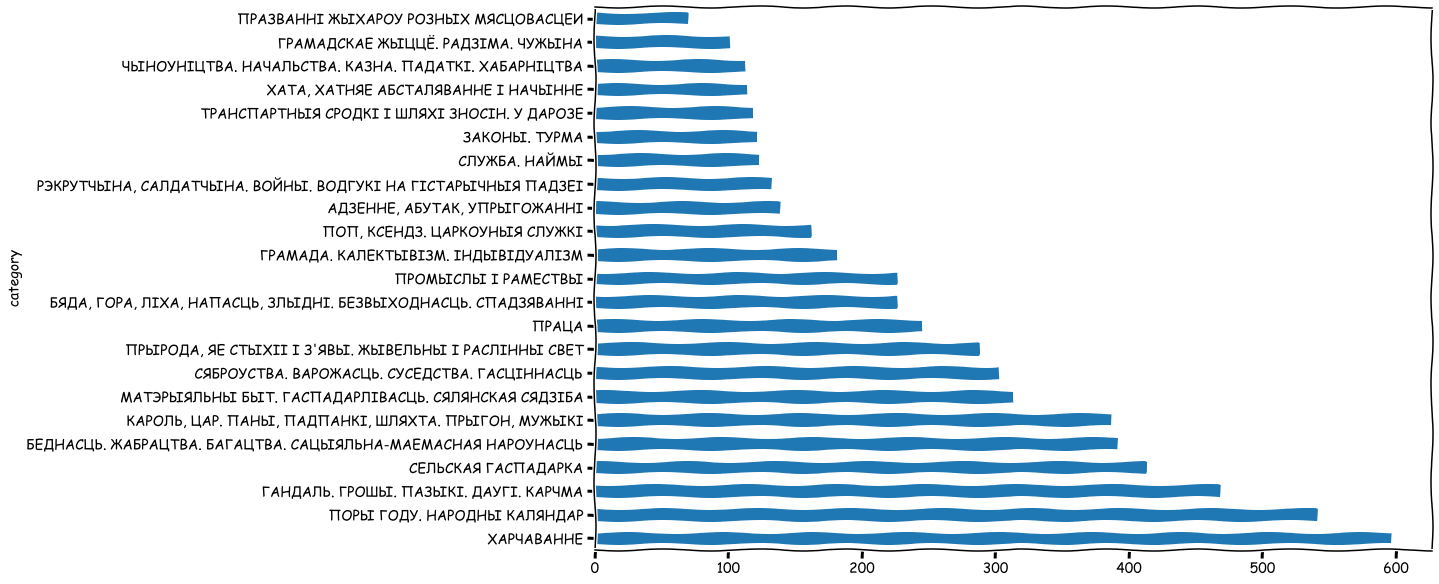

In [917]:
with plt.xkcd():
    print(prefiltered_proverbs.category.nunique())
    prefiltered_proverbs.value_counts('category').plot(kind='barh')

In [918]:
prefiltered_proverbs.to_csv('data/book_data/prefiltered_Беларуская_народная_творчасць.csv', index=None)

In [919]:
proverbs_dict["ПРЫРОДА, ЯЕ СТЫХІІ I З'ЯВЫ. ЖЫВЕЛЬНЫ I РАСЛІННЫ СВЕТ"][:20]

['Зямля — маці, а праца — бацька.',
 'Зямелька — матка наша: i корміць, i поіць, i адзяваець нас.',
 'Зямля — нас усіх маці; яна нас корміць, яна нас прыгорне. \nа) Зямелька нас корміць, а сама есці просіць.',
 'Зямля багацей ад усіх.',
 'Зямля не згарыць, не ўтоне. \nа) Зямля не тонець, не гарыць.',
 'На добрай зямлі добра надзея.',
 'Такая зямля добрая: пасадзі аглоблю — калёсы вырастуць.',
 'На добрай зямлі дзіця пасадзі, i тое вырасце.',
 'Якая зямля, такі i хлеб.',
 'На белай зямлі сабакі касцяць, на чорнай пшанічку расцяць.',
 'Да першага грому зямля не ачышчаецца.',
 'Пакуль гром не загрыміць, зямля не адтае.',
 'I зямля кажа.',
 'Зямля святая ўсё прымае.',
 'Трасіны, балоты — чортава кархавенне.',
 'Як балота курыць, то балацюк цямрыць, а як балота плюшчыць, балацюк пяшчыць.',
 'Сонца ўстане, так i дзень настане.',
 'Як слонка выгрэе, то аж сэрцу мілее.',
 'Слонца грэе — душа млее. \nа) Хоць сонца грэе, але душа млее.',
 'Колас добра не спее, калі сонца не грэе.']

# Алесь Зайка. Прыказкі і Прымаўкі з Косаўшчыны
Гэты pdf не мае тэксту, толькі карцінкі. Ачмурэць. Прыдзецца юзаць OCR. Нават баюся ўявіць, наколькі дрэнна ocr чытае беларускую мову.

### read pdf

In [1]:
import os
os.environ["TESSDATA_PREFIX"] = "/usr/local/Cellar/tesseract-lang/4.1.0/share/tessdata/"

import fitz

In [19]:
path = 'books/Zajka.Prykazki_i_prymauki_z_Kosauscyny_2015.pdf'
pdf = fitz.open(path)
test_page = pdf[50]
test_page
test_page.get_text()

''

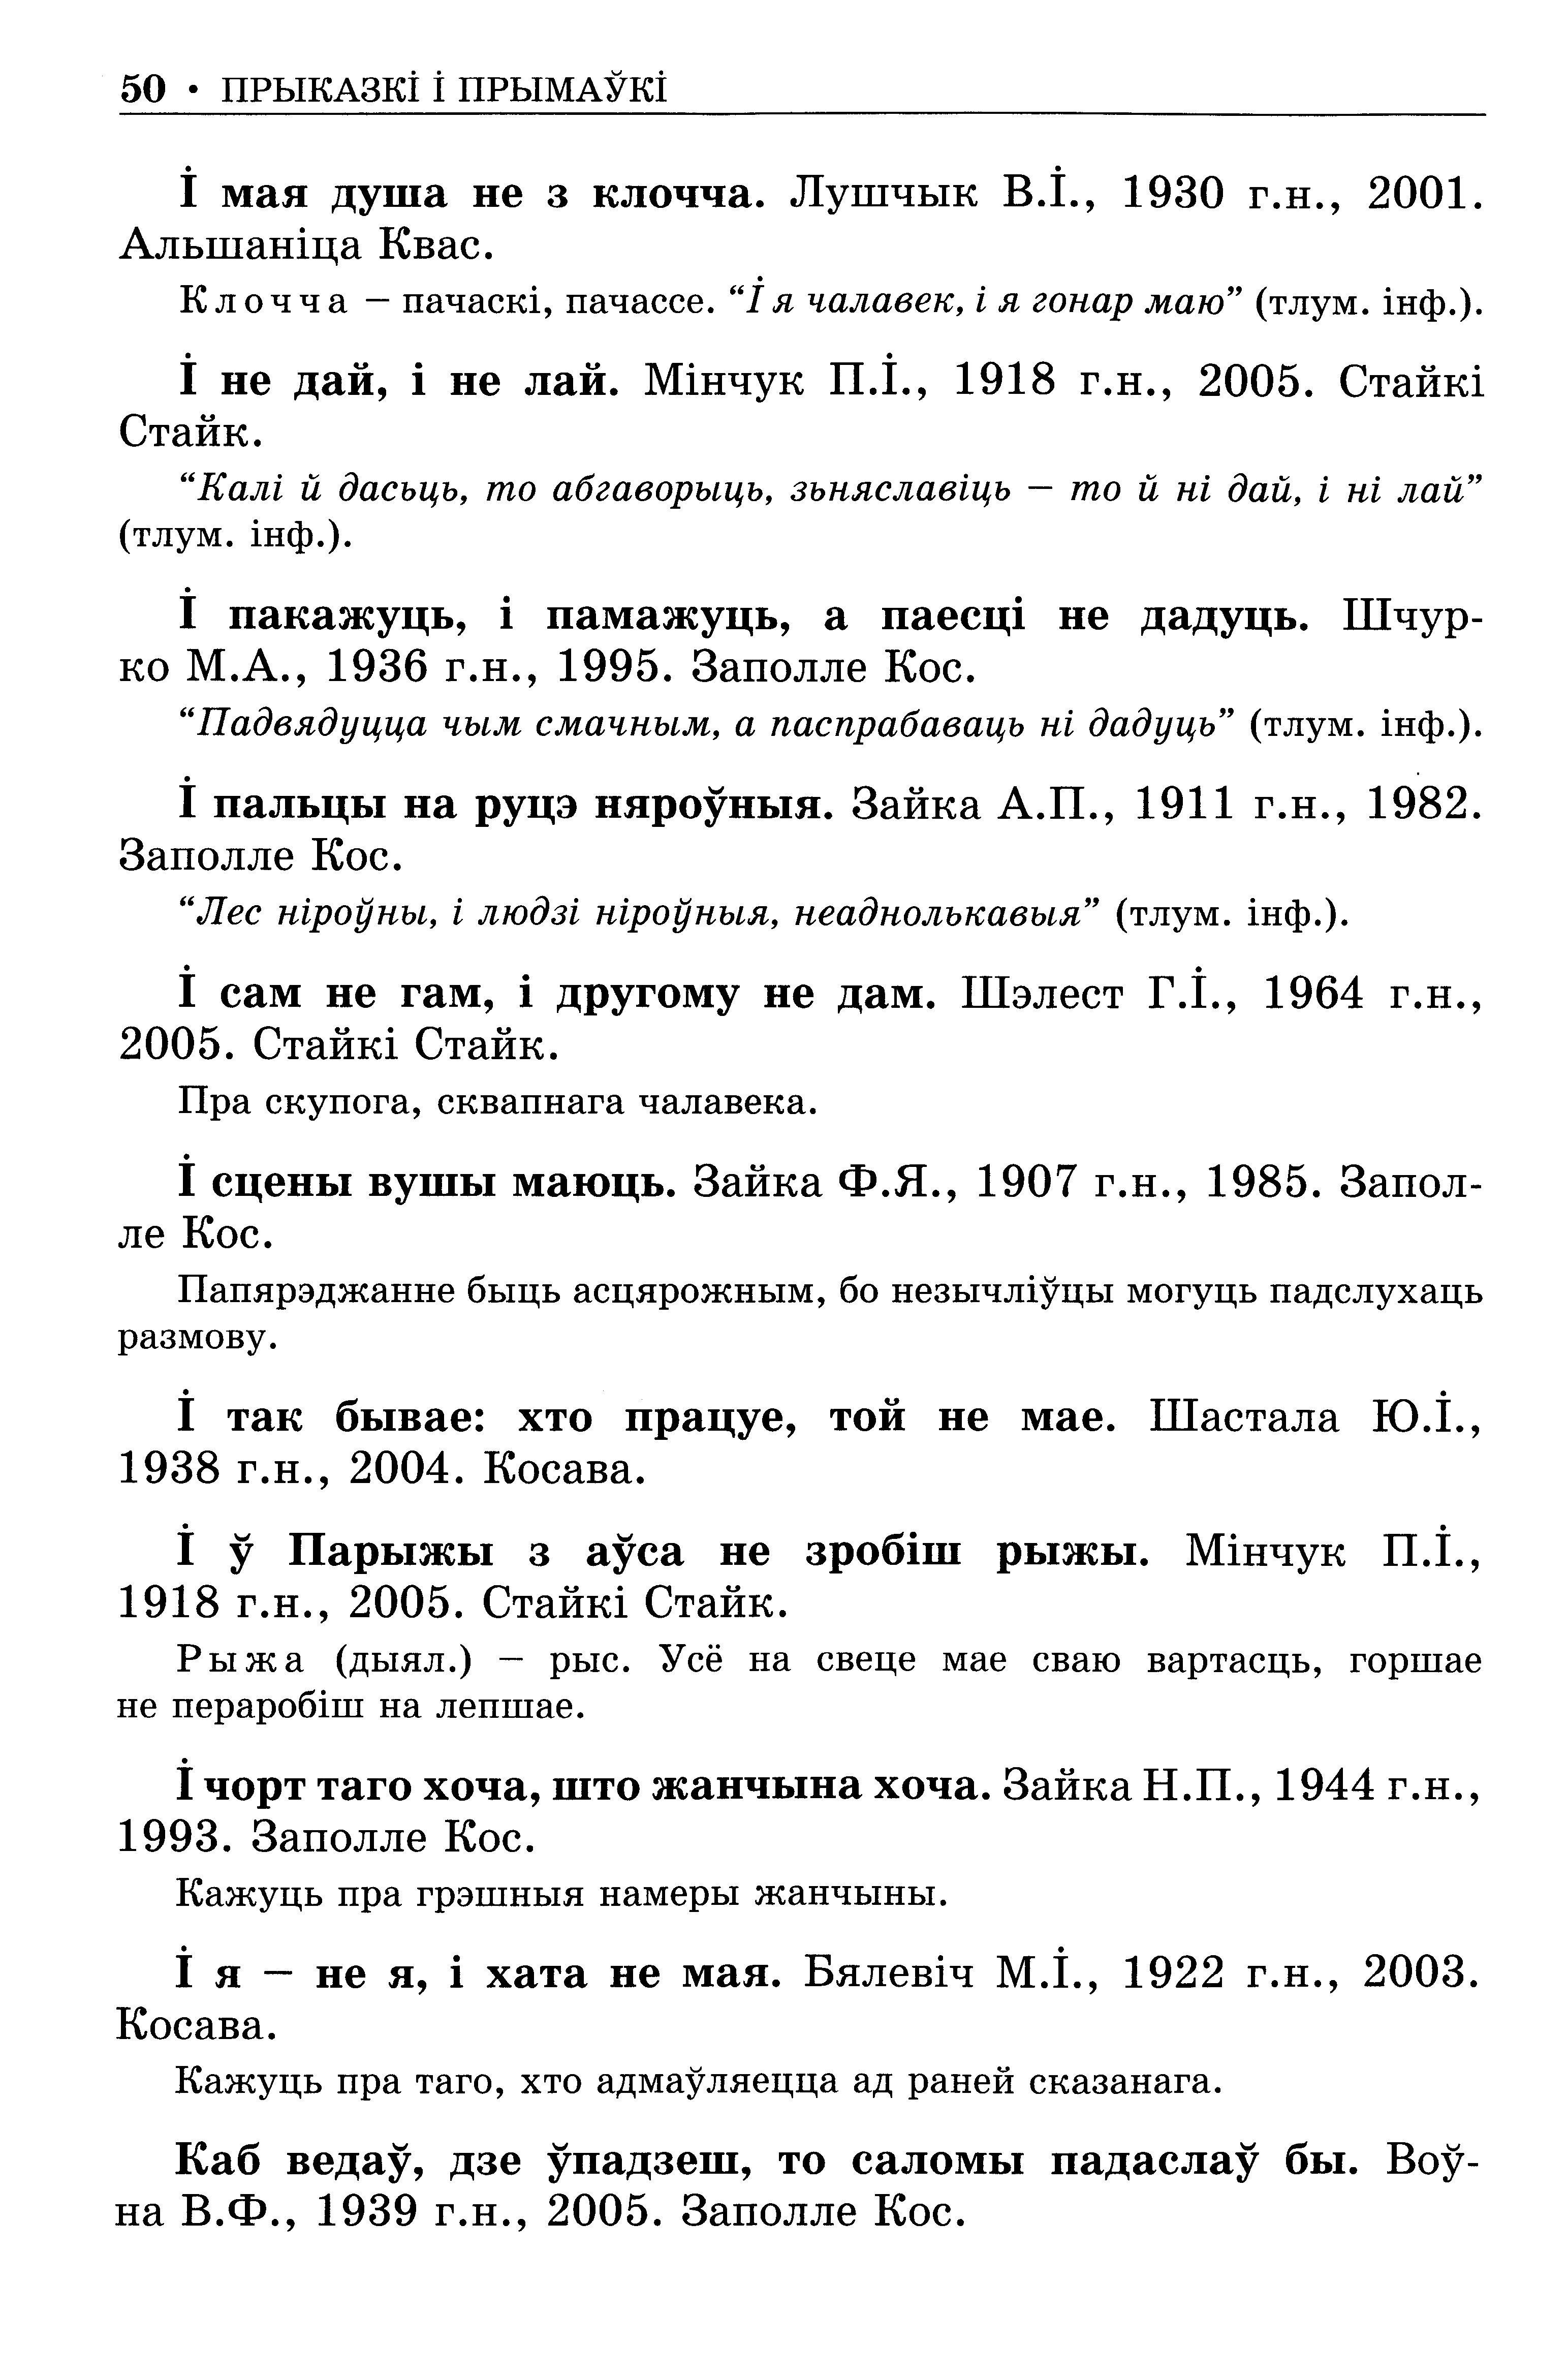

In [17]:
from PIL import Image
import io

ttext = test_page.get_text('dict')
img_bytes = ttext['blocks'][0]['image']
image = Image.open(io.BytesIO(img_bytes))
image

In [29]:
ocr_page = test_page.get_textpage_ocr(language='bel', flags=fitz.TEXT_DEHYPHENATE)

In [ ]:
for b in ocr_page.extractDICT()['blocks']:
    print(b)
    print('*'* 10)

In [52]:
ocr_page.extractDICT()['blocks'][1].keys()

dict_keys(['number', 'type', 'bbox', 'lines'])

In [56]:
ocr_page.extractBLOCKS()#['blocks'][1]['lines']

[(28.68000030517578,
  16.67998504638672,
  157.20477294921875,
  24.36373519897461,
  '50\n“ ПРЫКАЗКі\nі ПРЫМАЎКІ\n',
  0,
  0),
 (28.079999923706055,
  39.24002456665039,
  349.763916015625,
  76.08528900146484,
  'І мая душа не з клочча. Лушчык В.І., 1930 г.н., 2001.\nАльшаніца Квас.\nКлочча\n- пачаскі, пачассе. “Г я чалавек, ія гонар маю” (тлум. інф.).\n',
  1,
  0),
 (28.31999969482422,
  83.4000015258789,
  350.4288330078125,
  105.60381317138672,
  'І не дай, і не лай. Мінчук П.і., 1918 г.н., 2005. Стайкі\nСтайк.\n',
  2,
  0),
 (28.31999969482422,
  111.60002136230469,
  349.87200927734375,
  130.92405700683594,
  '“Калі й дасьць, то абгаворыць, зьняславіць - то й ні дай, і ні лай”\n(тлум. інф.).\n',
  3,
  0),
 (28.31999969482422,
  138.7200164794922,
  350.02197265625,
  175.92440795898438,
  'І пакажуць,\nі памажуць, а паесці не дадуць. Шчур-\nко М.А., 1936 г.н., 1995. Заполле Кос.\n“Падвядуцца чым смачным, а паспрабаваць ні дадуць” (тлум. інф.).\n',
  4,
  0),
 (28.31999969

In [49]:
blocks = test_page.get_text("blocks", textpage=ocr_page, flags=fitz.TEXT_DEHYPHENATE)
for b in blocks[1:]:
    print()
    print(b[4].replace("\n", " "))
    print('*'*10)



І мая душа не з клочча. Лушчык В.І., 1930 г.н., 2001. Альшаніца Квас. Клочча - пачаскі, пачассе. “Г я чалавек, ія гонар маю” (тлум. інф.). 
**********

І не дай, і не лай. Мінчук П.і., 1918 г.н., 2005. Стайкі Стайк. 
**********

“Калі й дасьць, то абгаворыць, зьняславіць - то й ні дай, і ні лай” (тлум. інф.). 
**********

І пакажуць, і памажуць, а паесці не дадуць. Шчур- ко М.А., 1936 г.н., 1995. Заполле Кос. “Падвядуцца чым смачным, а паспрабаваць ні дадуць” (тлум. інф.). 
**********

І пальцы на руцэ няроўныя. Зайка А.П., 1911 г.н., 1982. Заполле Кос. 
**********

“Лес ніроўны, і людзі ніроўныя, неаднолькавыя” (тлум. інф.). 
**********

І сам не гам, і другому не дам. Шэлест Г.І., 1964 г.н., 2005. Стайкі Стайк. Пра скупога, сквапнага чалавека. 
**********

І сцены вушы маюць. Зайка Ф.Я., 1907 г.н., 1985. Запол- ле Кое. 
**********

Папярэджанне быць асцярожным, бо незычліўцы могуць падслухаць размову. 
**********

І так бывае: хто працуе, той не мае. Шастала Ю.і., 1938 г.н., 2004. К

In [66]:
def calculate_y_difference(data):
    y_differences = []
    for i in range(len(data) - 1):
        y1_prev = data[i][3]
        y0_next = data[i + 1][1]
        difference = y0_next - y1_prev
        y_differences.append(difference)
        
        print(data[i][4].replace("\n", " "))
        print('difference with next block: ', difference)
        print('*' * 10)
    print(data[len(data)-1][4].replace("\n", " "))
    return y_differences

calculate_y_difference(blocks)

50 “ ПРЫКАЗКі і ПРЫМАЎКІ 
difference with next block:  14.876289367675781
**********
І мая душа не з клочча. Лушчык В.І., 1930 г.н., 2001. Альшаніца Квас. Клочча - пачаскі, пачассе. “Г я чалавек, ія гонар маю” (тлум. інф.). 
difference with next block:  7.3147125244140625
**********
І не дай, і не лай. Мінчук П.і., 1918 г.н., 2005. Стайкі Стайк. 
difference with next block:  5.996208190917969
**********
“Калі й дасьць, то абгаворыць, зьняславіць - то й ні дай, і ні лай” (тлум. інф.). 
difference with next block:  7.79595947265625
**********
І пакажуць, і памажуць, а паесці не дадуць. Шчур- ко М.А., 1936 г.н., 1995. Заполле Кос. “Падвядуцца чым смачным, а паспрабаваць ні дадуць” (тлум. інф.). 
difference with next block:  7.43560791015625
**********
І пальцы на руцэ няроўныя. Зайка А.П., 1911 г.н., 1982. Заполле Кос. 
difference with next block:  5.87615966796875
**********
“Лес ніроўны, і людзі ніроўныя, неаднолькавыя” (тлум. інф.). 
difference with next block:  7.4356689453125
*******

[14.876289367675781,
 7.3147125244140625,
 5.996208190917969,
 7.79595947265625,
 7.43560791015625,
 5.87615966796875,
 7.4356689453125,
 7.795989990234375,
 6.1162109375,
 7.796966552734375,
 7.91546630859375,
 7.7958984375,
 7.67596435546875,
 9.595977783203125]

In [ ]:
calculate_y_difference(pdf[12].get_textpage_ocr(language='bel', flags=fitz.TEXT_DEHYPHENATE).extractBLOCKS())